In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:/Users/Niranjan kumar/Desktop/FALL 2023/DATA ACQUISATION AND MANAGEMENT/Final Project/inpatientCharges.csv")
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [199]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [212]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [480]:
df.rename(columns={' Total Discharges ':'Total Discharges',' Average Covered Charges ':'Average Covered Charges',' Average Total Payments ':'Average Total Payments'},inplace=True)
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [481]:
df['Average Covered Charges']=pd.to_numeric(df['Average Covered Charges'].replace('[\$,]', '', regex=True))
df['Average Total Payments']=pd.to_numeric(df['Average Total Payments'].replace('[\$,]', '', regex=True))
df['Average Medicare Payments']=pd.to_numeric(df['Average Medicare Payments'].replace('[\$,]', '', regex=True))
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [203]:
df.shape

(163065, 12)

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,91,32963.07,5777.24,4763.73
1,14,15131.85,5787.57,4976.71
2,24,37560.37,5434.95,4453.79
3,25,13998.28,5417.56,4129.16
4,18,31633.27,5658.33,4851.44
...,...,...,...,...
163060,23,26314.39,3806.86,3071.39
163061,11,21704.72,4027.36,2649.72
163062,19,39121.73,5704.36,4058.36
163063,11,28873.09,7663.09,6848.54


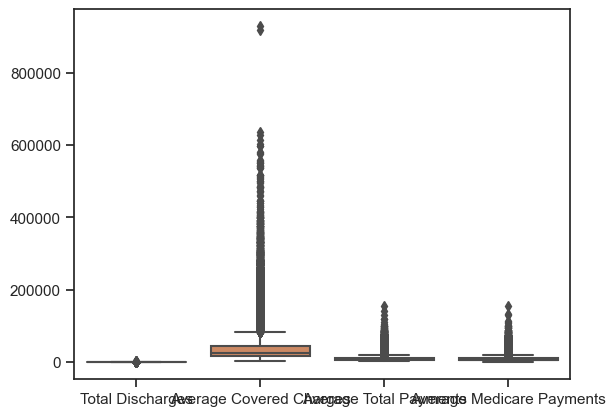

In [204]:
df1=df.iloc[:,8:12]
sns.boxplot(df1)
df1

In [205]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Total Discharges                32.00
Average Covered Charges      27285.43
Average Total Payments        6051.90
Average Medicare Payments     5864.53
dtype: float64


In [206]:
df2=df[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(134010, 12)

<Axes: ylabel='Count'>

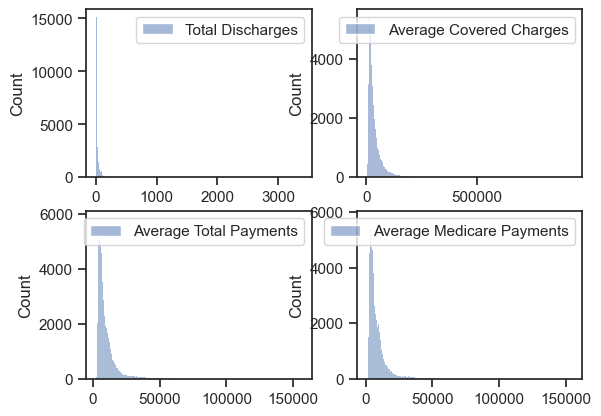

In [252]:
fig, axes = plt.subplots(2, 2)
sns.histplot(data=df[['Total Discharges']], ax=axes[0,0])
sns.histplot(data=df[['Average Covered Charges']],ax=axes[0,1])
sns.histplot(data=df[['Average Total Payments']],ax=axes[1,0])
sns.histplot(data=df[['Average Medicare Payments']],ax=axes[1,1])

In [13]:
df2.reset_index(drop=True).head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


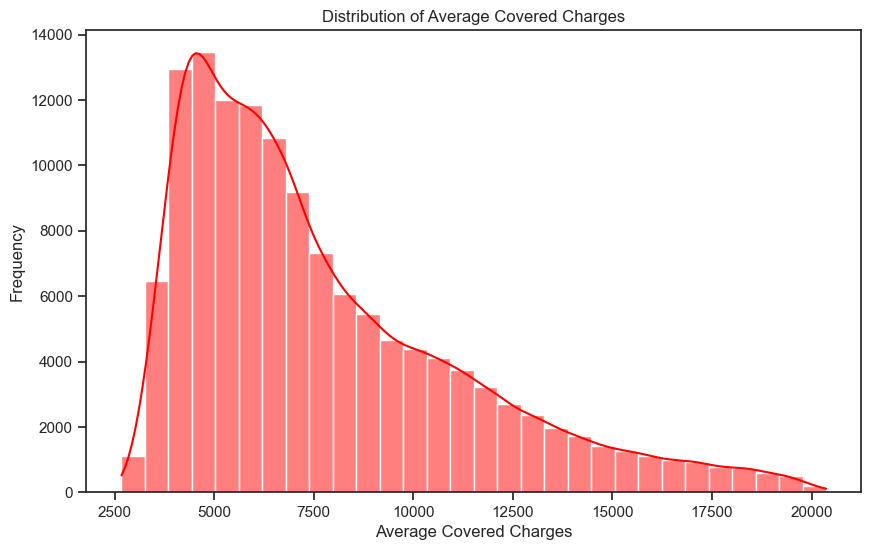

In [207]:
#EDA 
#Distribution of Single Variable:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Average Total Payments'],bins=30,kde=True,color='red')
plt.title('Distribution of Average Covered Charges')
plt.xlabel('Average Covered Charges')
plt.ylabel('Frequency')
plt.show()

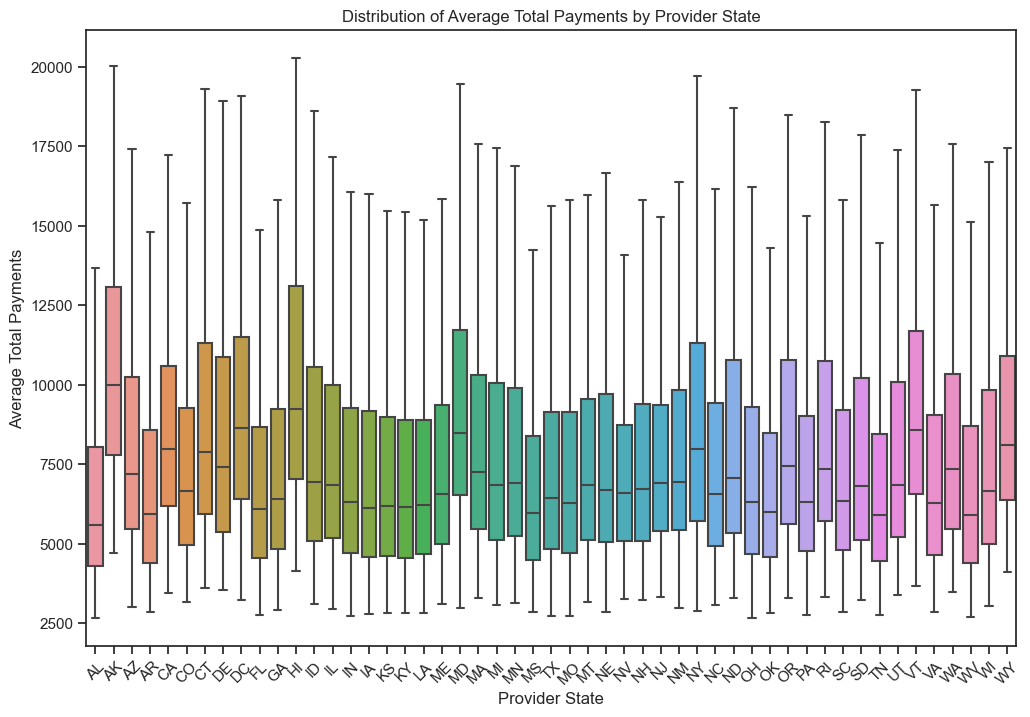

In [208]:
#distribution of one variable by another categorical variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='Provider State', y='Average Total Payments', data=df2,showfliers=False)
plt.title('Distribution of Average Total Payments by Provider State')
plt.xlabel('Provider State')
plt.ylabel('Average Total Payments')
plt.xticks(rotation=45)
plt.show()

C:\Users\Niranjan kumar\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

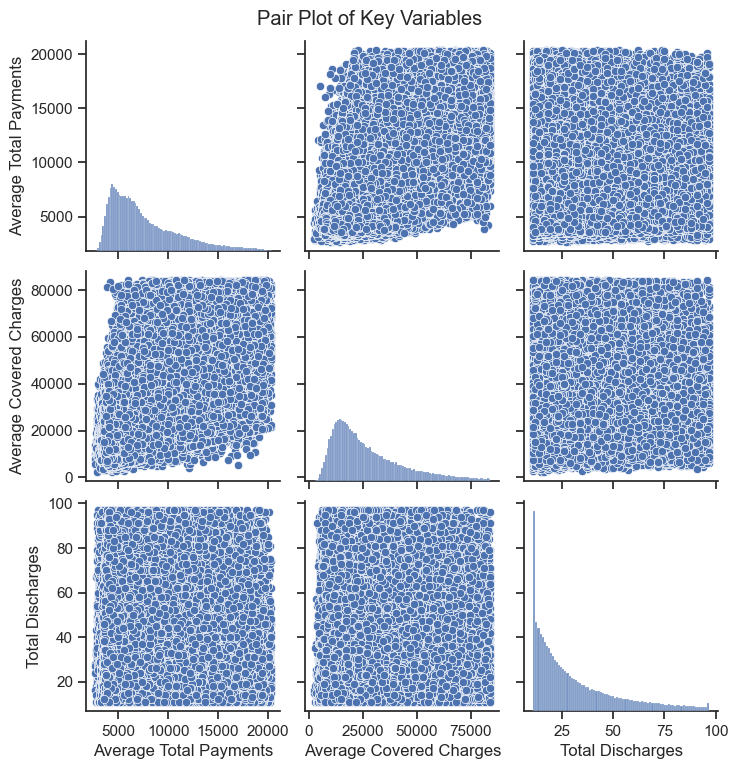

In [219]:
plt.figure(figsize=(12, 8))
sns.set(style='ticks')
sns.pairplot(df2[['Average Total Payments', 'Average Covered Charges', 'Total Discharges']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

In [46]:
df2.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
Total Discharges                          int64
Average Covered Charges                 float64
Average Total Payments                  float64
Average Medicare Payments               float64
dtype: object

In [455]:
# data1=df.loc[:,['Provider State','Total Discharges']]
# # from sklearn.preprocessing import StandardScaler
# # data1['zscore']=StandardScaler().fit_transform(data1.loc[: ,['Total Discharges']].values)
# # data1.head(50)

# data1.groupby(data1['Provider State']).count()

In [456]:
# from sklearn.preprocessing import OneHotEncoder
# color=color = df['Provider State'].values.reshape(-1, 1)
# color
# ohe = OneHotEncoder()
# ohe.fit(color)
# X_ohe = ohe.transform(color).toarray()
# X_ohe

In [457]:
# ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out(['Provider State']))
# ohe_df.head()

In [458]:
# df = pd.concat([df, ohe_df], axis=1)
# df

In [482]:
state_to_region = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'NV': 'West', 'OR': 'West', 'WA': 'West','ID': 'West', 'MT': 'West', 'WY': 'West',
    'UT': 'West', 'CO': 'West', 'NM': 'West','AZ': 'West',
    
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest','ND': 'Midwest', 'MN': 'Midwest', 'SD': 'Midwest',
    'NE': 'Midwest', 'IA': 'Midwest','KS': 'Midwest', 'MO': 'Midwest',
    
    'AL': 'South', 'AR': 'South','DC': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South', 'KY': 'South', 'LA': 'South',
    'MD': 'South', 'MS': 'South', 'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'WV': 'South'
}

df['Provider Region'] = df['Provider State'].map(state_to_region)
df.head()


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Provider Region
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,South
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,South
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,South
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,South
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,South


<Axes: xlabel='Provider Region'>

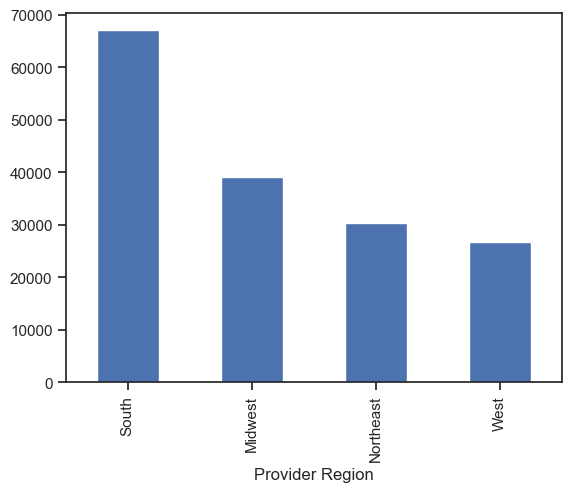

In [460]:
df['Provider Region'].value_counts().plot.bar()

In [483]:
#Z-value for the Provider Region
list=df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']].groupby(df['Provider Region'])
list1=list.transform('mean')
list2=list.transform('std')
data=(df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']] - list1)/list2
data.columns = [f"{col}_z-value_PR" for col in data.columns]
data.head()

,Total Discharges_z-value_PR,Average Covered Charges_z-value_PR,Average Total Payments_z-value_PR,Average Medicare Payments_z-value_PR
0,0.908503,-0.013146,-0.461808,-0.459220
1,-0.573785,-0.601873,-0.460301,-0.426420
2,-0.381280,0.138641,-0.511775,-0.506951
3,-0.362030,-0.639300,-0.514314,-0.556945
4,-0.496783,-0.057052,-0.479167,-0.445712


In [484]:
df=pd.concat([df,data],axis=1)
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Provider Region,Total Discharges_z-value_PR,Average Covered Charges_z-value_PR,Average Total Payments_z-value_PR,Average Medicare Payments_z-value_PR
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,South,0.908503,-0.013146,-0.461808,-0.459220
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,South,-0.573785,-0.601873,-0.460301,-0.426420
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,South,-0.381280,0.138641,-0.511775,-0.506951
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,South,-0.362030,-0.639300,-0.514314,-0.556945
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,South,-0.496783,-0.057052,-0.479167,-0.445712


Summary: Represents the Z-score of the total discharges for each provider in relation to the mean and standard deviation of total discharges within its 'Provider Region'.

Insight: Unusually high or low Z-scores may indicate providers with significantly different total discharge patterns compared to others in the same region, potentially signaling irregularities in reporting or billing.

In [485]:
list=df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']].groupby(df['DRG Definition'])
list1=list.transform('mean')
list2=list.transform('std')
data1=(df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']] - list1)/list2
data1.columns = [f"{col}_z-value_DRG" for col in data1.columns]
data1.head()

,Total Discharges_z-value_DRG,Average Covered Charges_z-value_DRG,Average Total Payments_z-value_DRG,Average Medicare Payments_z-value_DRG
0,2.731021,0.155639,-0.800673,-0.640831
1,-0.782309,-0.962919,-0.793683,-0.468526
2,-0.326033,0.444029,-1.032283,-0.891578
3,-0.280405,-1.034028,-1.044050,-1.154211
4,-0.599799,0.072220,-0.881133,-0.569872


In [486]:
df=pd.concat([df,data1],axis=1)
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Average Medicare Payments,Provider Region,Total Discharges_z-value_PR,Average Covered Charges_z-value_PR,Average Total Payments_z-value_PR,Average Medicare Payments_z-value_PR,Total Discharges_z-value_DRG,Average Covered Charges_z-value_DRG,Average Total Payments_z-value_DRG,Average Medicare Payments_z-value_DRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,4763.73,South,0.908503,-0.013146,-0.461808,-0.459220,2.731021,0.155639,-0.800673,-0.640831
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,4976.71,South,-0.573785,-0.601873,-0.460301,-0.426420,-0.782309,-0.962919,-0.793683,-0.468526
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,4453.79,South,-0.381280,0.138641,-0.511775,-0.506951,-0.326033,0.444029,-1.032283,-0.891578
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,4129.16,South,-0.362030,-0.639300,-0.514314,-0.556945,-0.280405,-1.034028,-1.044050,-1.154211
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,4851.44,South,-0.496783,-0.057052,-0.479167,-0.445712,-0.599799,0.072220,-0.881133,-0.569872


In [487]:
list=df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']].groupby(df['Hospital Referral Region Description'])
list1=list.transform('mean')
list2=list.transform('std')
data2=(df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']] - list1)/list2
data2.columns = [f"{col}_z-value_Reff" for col in data2.columns]
data2.head()

,Total Discharges_z-value_Reff,Average Covered Charges_z-value_Reff,Average Total Payments_z-value_Reff,Average Medicare Payments_z-value_Reff
0,1.359967,0.228345,-0.273428,-0.276261
1,-0.637461,-0.551520,-0.357915,-0.307998
2,-0.351035,0.044807,-0.423086,-0.408636
3,-0.322393,-0.581659,-0.426301,-0.471111
4,-0.522891,-0.112782,-0.381801,-0.332107


In [488]:
df=pd.concat([df,data2],axis=1)
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Average Total Payments_z-value_PR,Average Medicare Payments_z-value_PR,Total Discharges_z-value_DRG,Average Covered Charges_z-value_DRG,Average Total Payments_z-value_DRG,Average Medicare Payments_z-value_DRG,Total Discharges_z-value_Reff,Average Covered Charges_z-value_Reff,Average Total Payments_z-value_Reff,Average Medicare Payments_z-value_Reff
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,-0.461808,-0.459220,2.731021,0.155639,-0.800673,-0.640831,1.359967,0.228345,-0.273428,-0.276261
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,-0.460301,-0.426420,-0.782309,-0.962919,-0.793683,-0.468526,-0.637461,-0.551520,-0.357915,-0.307998
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,-0.511775,-0.506951,-0.326033,0.444029,-1.032283,-0.891578,-0.351035,0.044807,-0.423086,-0.408636
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,-0.514314,-0.556945,-0.280405,-1.034028,-1.044050,-1.154211,-0.322393,-0.581659,-0.426301,-0.471111
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,-0.479167,-0.445712,-0.599799,0.072220,-0.881133,-0.569872,-0.522891,-0.112782,-0.381801,-0.332107


In [489]:
list=df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']].groupby(df['Provider City'])
list1=list.transform('mean')
list2=list.transform('std')
data3=(df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']] - list1)/list2
data3.columns = [f"{col}_z-value_ProvCity" for col in data2.columns]
data3.head()

,Total Discharges_z-value_Reff_z-value_ProvCity,Average Covered Charges_z-value_Reff_z-value_ProvCity,Average Total Payments_z-value_Reff_z-value_ProvCity,Average Medicare Payments_z-value_Reff_z-value_ProvCity
0,0.832397,-0.253140,-0.456736,-0.444381
1,-0.819453,-0.147131,-0.376991,-0.293387
2,-0.576670,-0.141190,-0.534900,-0.524413
3,-0.443947,-0.749566,-0.537415,-0.540631
4,-0.569835,-0.358372,-0.468360,-0.385997


In [490]:
df=pd.concat([df,data3],axis=1)
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Average Total Payments_z-value_DRG,Average Medicare Payments_z-value_DRG,Total Discharges_z-value_Reff,Average Covered Charges_z-value_Reff,Average Total Payments_z-value_Reff,Average Medicare Payments_z-value_Reff,Total Discharges_z-value_Reff_z-value_ProvCity,Average Covered Charges_z-value_Reff_z-value_ProvCity,Average Total Payments_z-value_Reff_z-value_ProvCity,Average Medicare Payments_z-value_Reff_z-value_ProvCity
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,-0.800673,-0.640831,1.359967,0.228345,-0.273428,-0.276261,0.832397,-0.253140,-0.456736,-0.444381
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,-0.793683,-0.468526,-0.637461,-0.551520,-0.357915,-0.307998,-0.819453,-0.147131,-0.376991,-0.293387
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,-1.032283,-0.891578,-0.351035,0.044807,-0.423086,-0.408636,-0.576670,-0.141190,-0.534900,-0.524413
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,-1.044050,-1.154211,-0.322393,-0.581659,-0.426301,-0.471111,-0.443947,-0.749566,-0.537415,-0.540631
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,-0.881133,-0.569872,-0.522891,-0.112782,-0.381801,-0.332107,-0.569835,-0.358372,-0.468360,-0.385997


In [491]:
df['Total Discharges'].describe()

count    163065.000000
mean         42.776304
std          51.104042
min          11.000000
25%          17.000000
50%          27.000000
75%          49.000000
max        3383.000000
Name: Total Discharges, dtype: float64

In [492]:
bin_edges = [10, 20, 30, 40, 50, 100, 200, 500, 1000, 2000, 4000]
bin_labels = ['10-19', '20-29', '30-39', '40-49', '50-99', '100-199', '200-499', '500-999', '1000-1999', '2000-4000']
df['Discharge Bins'] = pd.cut(df['Total Discharges'], bins=bin_edges, labels=bin_labels, right=False)
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Average Medicare Payments_z-value_DRG,Total Discharges_z-value_Reff,Average Covered Charges_z-value_Reff,Average Total Payments_z-value_Reff,Average Medicare Payments_z-value_Reff,Total Discharges_z-value_Reff_z-value_ProvCity,Average Covered Charges_z-value_Reff_z-value_ProvCity,Average Total Payments_z-value_Reff_z-value_ProvCity,Average Medicare Payments_z-value_Reff_z-value_ProvCity,Discharge Bins
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,-0.640831,1.359967,0.228345,-0.273428,-0.276261,0.832397,-0.253140,-0.456736,-0.444381,50-99
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,-0.468526,-0.637461,-0.551520,-0.357915,-0.307998,-0.819453,-0.147131,-0.376991,-0.293387,10-19
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,-0.891578,-0.351035,0.044807,-0.423086,-0.408636,-0.576670,-0.141190,-0.534900,-0.524413,20-29
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,-1.154211,-0.322393,-0.581659,-0.426301,-0.471111,-0.443947,-0.749566,-0.537415,-0.540631,20-29
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,-0.569872,-0.522891,-0.112782,-0.381801,-0.332107,-0.569835,-0.358372,-0.468360,-0.385997,10-19


In [493]:
df['Discharge Bins'].value_counts()
pd.get_dummies(df['Discharge Bins'])

,10-19,20-29,30-39,40-49,50-99,100-199,200-499,500-999,1000-1999,2000-4000
0,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
163060,False,True,False,False,False,False,False,False,False,False
163061,True,False,False,False,False,False,False,False,False,False
163062,True,False,False,False,False,False,False,False,False,False
163063,True,False,False,False,False,False,False,False,False,False


In [494]:
from sklearn.preprocessing import OneHotEncoder
color=color = df['Discharge Bins'].values.reshape(-1, 1)
color
ohe = OneHotEncoder()
ohe.fit(color)
X_ohe = ohe.transform(color).toarray()
X_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [495]:
ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out(['Discharge Bins']))
ohe_df.head()

,Discharge Bins_10-19,Discharge Bins_100-199,Discharge Bins_1000-1999,Discharge Bins_20-29,Discharge Bins_200-499,Discharge Bins_2000-4000,Discharge Bins_30-39,Discharge Bins_40-49,Discharge Bins_50-99,Discharge Bins_500-999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
